In [10]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [11]:
# Load Data Viz Pkgs
import seaborn as sns

In [12]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [13]:
# Load Dataset
df = pd.read_csv("emotion_dataset_raw.csv")

In [14]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [15]:
# Value Counts
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

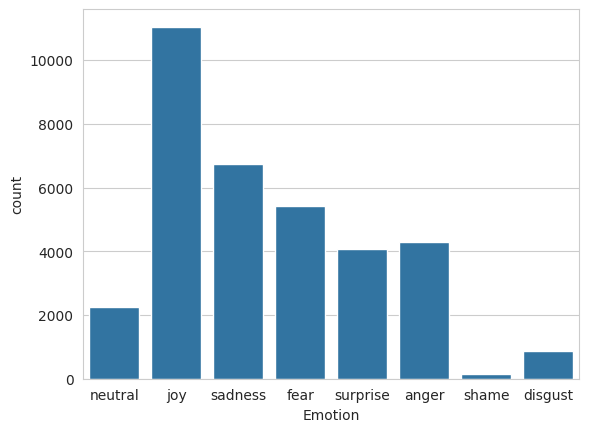

In [16]:
# Plot
sns.countplot(x='Emotion',data=df)

In [34]:
|pip install neattext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.9 MB/s eta 0:00:00


NeatText Library - NeatText is a Python library that offers text preprocessing functions for cleaning and normalizing text data. It provides various text cleaning operations to remove noise, normalize text, and handle common text-related issues.

In [35]:
import neattext.functions as nfx

This are the various types provided by neatext library to preprocess the data

In [41]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [36]:
df['clean_text'] = df['Text'].apply(nfx.remove_userhandles)

This removes the usernames used in the text and cleans the text!

In [37]:
df['clean_text'] = df['Text'].apply(nfx.remove_stopwords)

In [39]:
df

,Emotion,Text,clean_text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,@Iluvmiasantos ugh babe.. hugggzzz u .! babe n...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,@MichelGW gift! Hope like it! hand wear ! It'l...
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [43]:
# Features & Labels
Xfeatures = df['clean_text']
ylabels = df['Emotion']

In [44]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [45]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [46]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [47]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [49]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [48]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6224372485150412

In [51]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [67]:
# Make A Prediction
ex1 = "feeling fail french #fuckfrench "
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [52]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[1.44596494e-03, 6.22860496e-03, 5.17294325e-03, 9.54394087e-01,
        9.30082288e-05, 2.26427842e-02, 5.94487653e-05, 9.96315827e-03]])

In [53]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

Prediction and classification ends here

below are some EDA methods to understand the data efficiently.

In [62]:
# Filter texts based on the 'joy' subset
joy_texts = df[df['Emotion'] == 'joy']['Text']
print(joy_texts.head(5))

1       Sage Act upgrade on my to do list for tommorow.
3      Such an eye ! The true hazel eye-and so brill...
4     @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
12    For once in his life , Leopold must have been ...
17      I have a feeling i will fail french #fuckfrench
Name: Text, dtype: object


In [61]:
# Filter texts based on the 'joy' subset
arr_texts = df[df['Emotion'] == 'disgust']['Text']
print(arr_texts.head(5))


90     @wt2themax1 I'm sorry my blanket isn't comfort...
134    It linked the poor performance with the exodus...
197    ewww she got that nasty ass default like she c...
204    I understand the mood but if some of them are ...
231    &quot;was that a period poop? it definitely sm...
Name: Text, dtype: object


In [66]:
# Define the text to find
text_to_find = "I have a feeling i will fail french #fuckfrench"

# Search for the text in the 'Text' column
found_text = df[df['Text'] == text_to_find]
print(found_text)

   Emotion                                             Text  \
17     joy  I have a feeling i will fail french #fuckfrench   

                         clean_text  
17  feeling fail french #fuckfrench  
